<a href="https://www.kaggle.com/code/kongkhamluangkhot/living-expense-and-purchase-power-by-countries?scriptVersionId=192548339" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

import warnings
warnings.filterwarnings("ignore") #ignore all warning

/kaggle/input/cost-of-living-index-by-country-by-number-2024/Cost_of_Living_Index_by_Country_2024.csv


In [2]:
df = pd.read_csv("/kaggle/input/cost-of-living-index-by-country-by-number-2024/Cost_of_Living_Index_by_Country_2024.csv")

In [3]:
df.head()

,Rank,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,1,Switzerland,101.1,46.5,74.9,109.1,97.0,158.7
1,2,Bahamas,85.0,36.7,61.8,81.6,83.3,54.6
2,3,Iceland,83.0,39.2,62.0,88.4,86.8,120.3
3,4,Singapore,76.7,67.2,72.1,74.6,50.4,111.1
4,5,Barbados,76.6,19.0,48.9,80.8,69.4,43.5


# Cleaning data

In [4]:
df.isna().sum()

Rank                              0
Country                           0
Cost of Living Index              0
Rent Index                        0
Cost of Living Plus Rent Index    0
Groceries Index                   0
Restaurant Price Index            0
Local Purchasing Power Index      0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Rank                            121 non-null    int64  
 1   Country                         121 non-null    object 
 2   Cost of Living Index            121 non-null    float64
 3   Rent Index                      121 non-null    float64
 4   Cost of Living Plus Rent Index  121 non-null    float64
 5   Groceries Index                 121 non-null    float64
 6   Restaurant Price Index          121 non-null    float64
 7   Local Purchasing Power Index    121 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 7.7+ KB


In [7]:
df.describe()

,Rank,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
count,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000
mean,61.000000,43.555372,16.052893,30.357851,44.228926,36.471074,65.094215
std,35.073732,16.147574,11.412267,13.263721,17.055109,18.258110,39.569094
min,1.000000,18.800000,2.400000,11.100000,17.500000,12.800000,2.300000
25%,31.000000,30.200000,8.500000,19.800000,31.600000,21.600000,34.800000
50%,61.000000,39.500000,12.400000,27.000000,40.500000,33.100000,50.600000
75%,91.000000,52.800000,20.100000,37.000000,53.700000,47.200000,99.400000
max,121.000000,101.100000,67.200000,74.900000,109.100000,97.000000,182.500000


In [8]:
df.shape

(121, 8)

# Ploting data

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

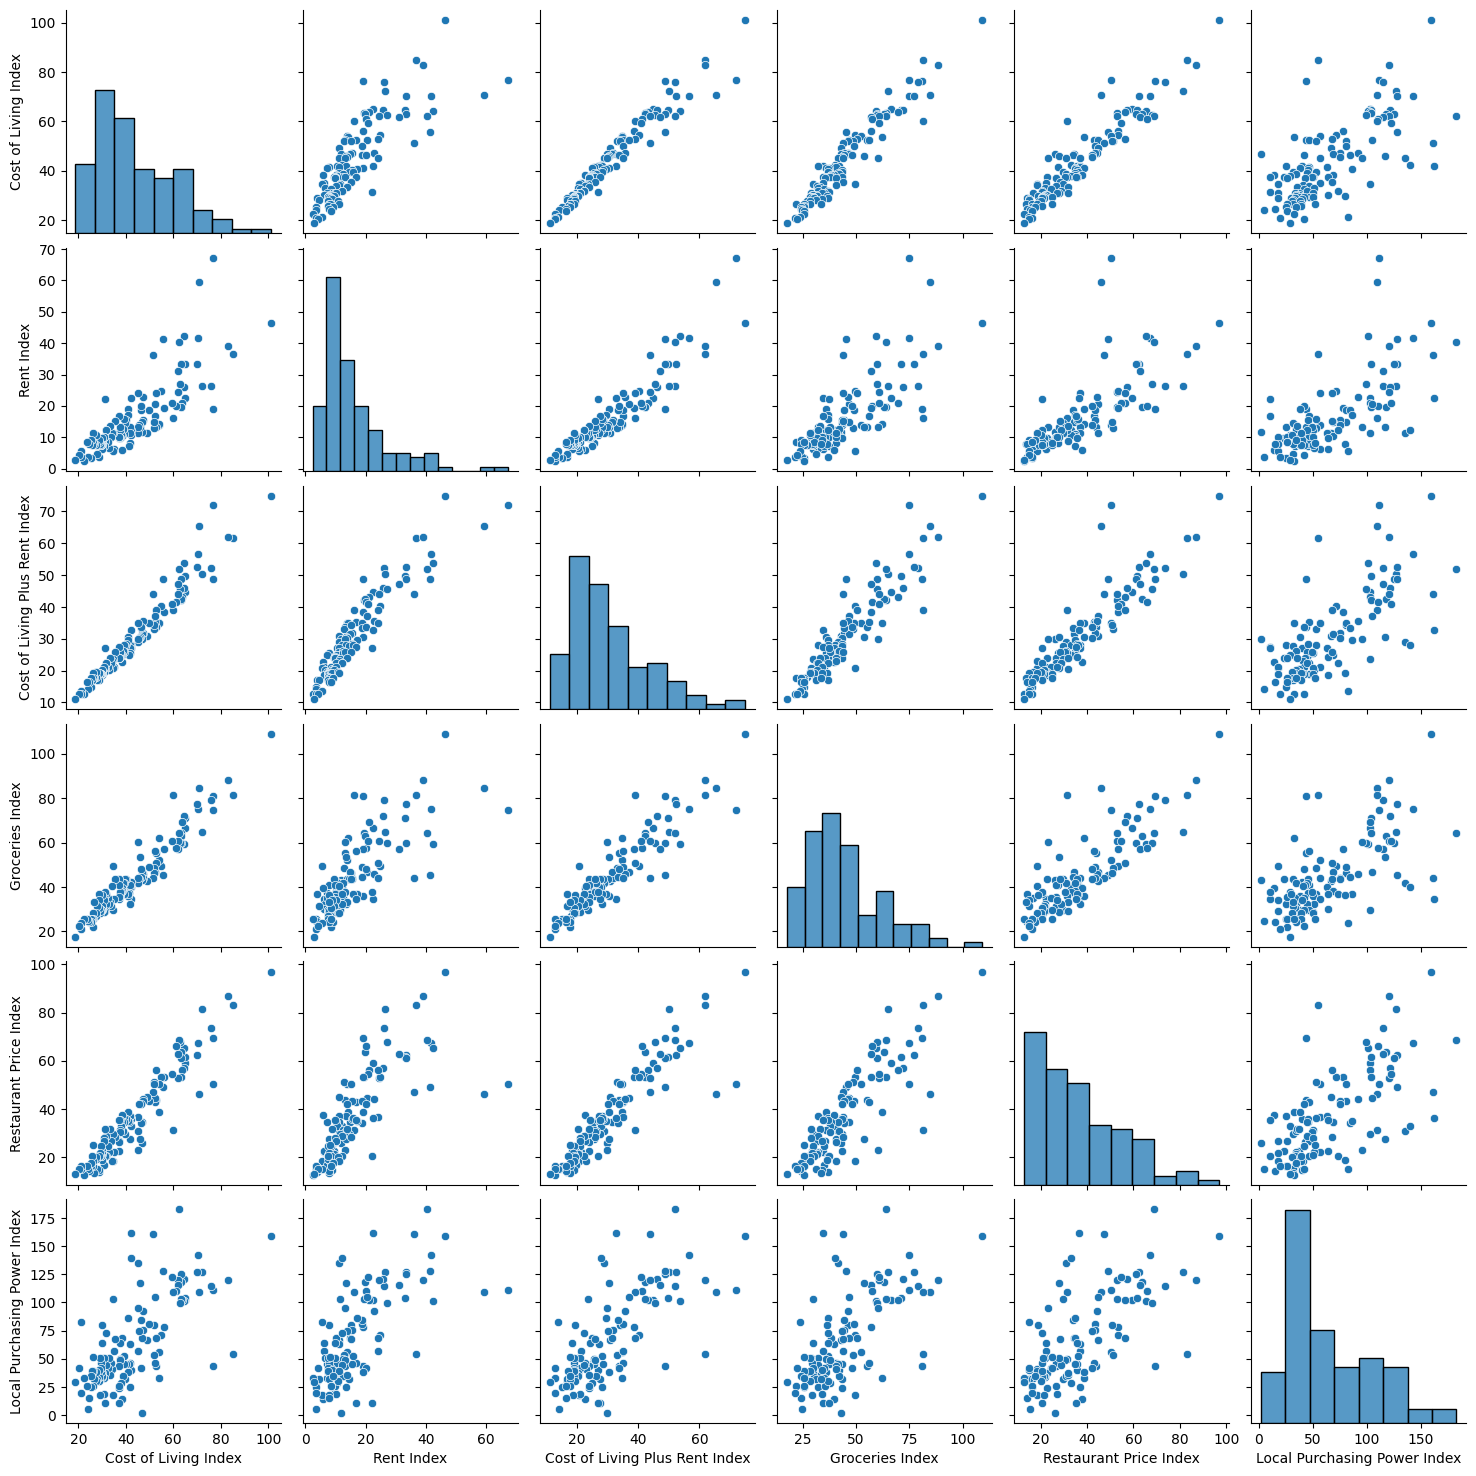

In [10]:
# Plot Std
sns.pairplot(df, vars=df.columns[2:])
plt.show()

In [11]:
# Grab neccessary data
df_country = df.groupby(["Country"])

df_costLiving = df_country[["Cost of Living Index"]].mean()
df_purchasePower = df_country[["Local Purchasing Power Index"]].mean()

# Reset Country field to be in the same level
df_costLiving.reset_index(level=0, inplace=True)
df_purchasePower.reset_index(level=0, inplace=True)

# Prepare data for plotting 
df_sortCostOfLiving = df_costLiving.sort_values("Cost of Living Index", ascending = False)
df_sortPurchasePower = df_purchasePower.sort_values("Local Purchasing Power Index", ascending = False)

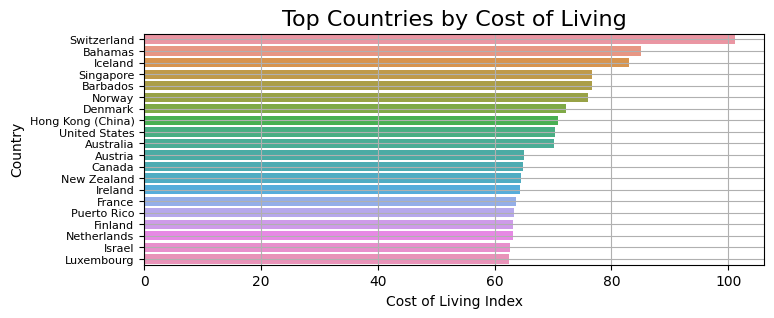

In [12]:
fig, ax = plt.subplots(figsize=(8, 3)) # set graph size
sns.barplot(data=df_sortCostOfLiving[:20], y="Country", x="Cost of Living Index")
plt.title("Top Countries by Cost of Living", fontsize = 16)
plt.yticks(rotation=0, fontsize = 8)
plt.grid()
plt.show()

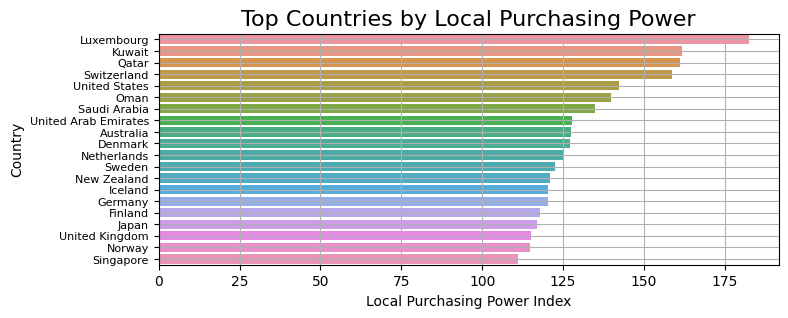

In [13]:
fig, ax = plt.subplots(figsize=(8, 3)) # set graph size
sns.barplot(data=df_sortPurchasePower[:20], y = "Country", x = "Local Purchasing Power Index")
plt.title("Top Countries by Local Purchasing Power", fontsize = 16)
plt.yticks(rotation=0, fontsize = 8)
plt.grid()
plt.show()

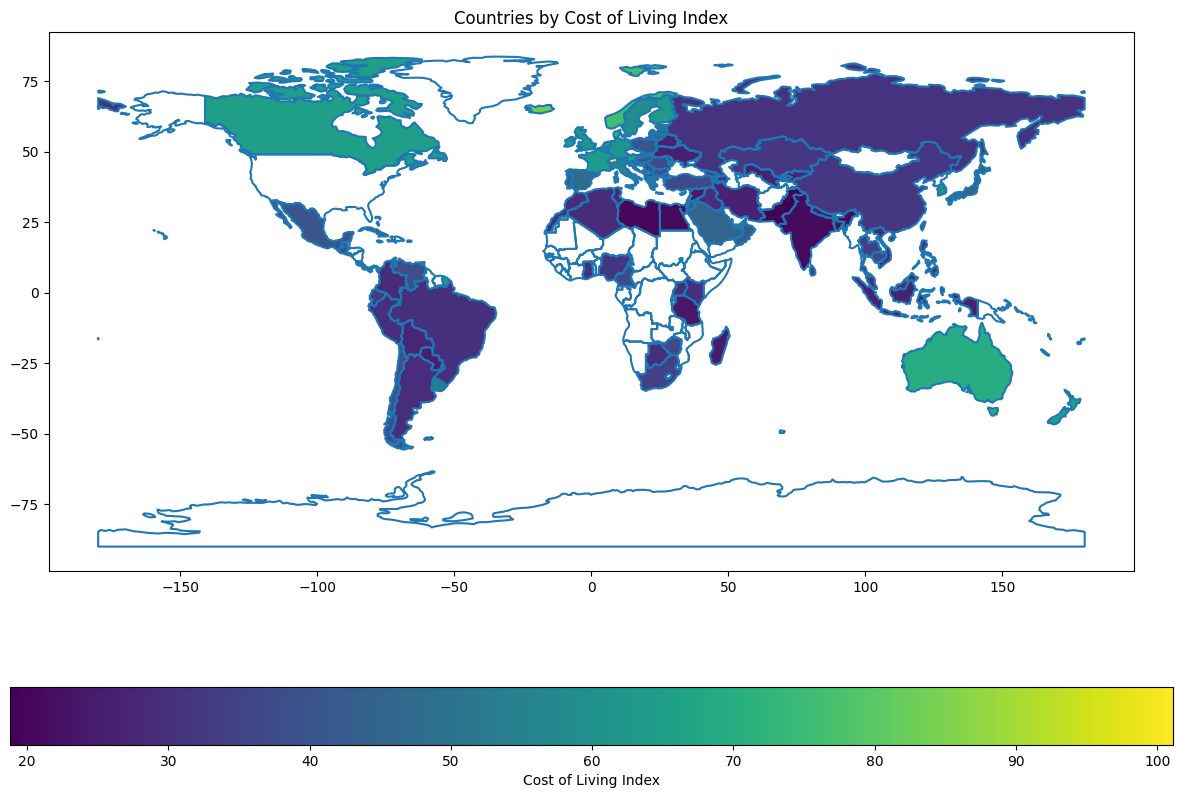

In [14]:
import geopandas as gpd
import matplotlib.pyplot as plt

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

filtered_world = world[world['name'].isin(df['Country'])]

merged = filtered_world.set_index('name').join(
    pd.DataFrame(df).set_index('Country')
)

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax)
merged.plot(column='Cost of Living Index', ax=ax, legend=True, legend_kwds={'label': "Cost of Living Index", 'orientation': "horizontal"})

plt.title('Countries by Cost of Living Index')
plt.show()

In [15]:
import plotly.express as px
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

world = world.rename(columns={'name': 'Country'})
merged = world.merge(df, on='Country')

fig = px.choropleth(
    merged,
    locations="Country",
    locationmode='country names',
    color="Cost of Living Index",
    hover_name="Country",
    hover_data={
        'Cost of Living Index': True,
        'Rent Index': True,
        'Cost of Living Plus Rent Index': True,
        'Groceries Index': True,
        'Restaurant Price Index': True,
        'Local Purchasing Power Index': True
    },
    color_continuous_scale=px.colors.sequential.Plasma,
    title="Countries by Cost of Living Index"
)
fig.update_layout(margin=dict(l=0, r=0, t=100, b=50))

fig.show()